# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Vanesya Meisyarah
- **Email:** vanesya.rah@gmail.com
- **ID Dicoding:** m891d5x1930

## Menentukan Pertanyaan Bisnis

- Seberapa besar perbedaan rata-rata jumlah peminjaman sepeda pada setiap kondisi cuaca selama tahun 2011–2012?
- Musim apa yang memiliki rata-rata jumlah peminjaman sepeda tertinggi dan terendah selama periode 2011–2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = df = pd.read_csv("data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.shape

(731, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset Bike Sharing terdiri dari 731 baris dan 16 kolom yang merepresentasikan data peminjaman sepeda harian.
- Dataset memiliki variabel target cnt yang menunjukkan total peminjaman sepeda, serta beberapa variabel pendukung seperti musim, cuaca, dan hari kerja.

### Assessing Data

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.duplicated().sum()

0

**Insight:**
- Tidak ditemukan missing value pada dataset, sehingga data dapat langsung digunakan untuk analisis lanjutan.
- Dataset tidak memiliki data duplikat, menandakan data sudah cukup bersih secara struktur.

### Cleaning Data

In [7]:
df_clean = df.copy()
df_clean.rename(columns={'cnt': 'total_rentals'}, inplace=True)
df_clean['dteday'] = pd.to_datetime(df_clean['dteday'])
df_clean.dtypes

instant                   int64
dteday           datetime64[ns]
season                    int64
yr                        int64
mnth                      int64
holiday                   int64
weekday                   int64
workingday                int64
weathersit                int64
temp                    float64
atemp                   float64
hum                     float64
windspeed               float64
casual                    int64
registered                int64
total_rentals             int64
dtype: object

**Insight:**
- Kolom cnt diubah menjadi total_rentals untuk meningkatkan keterbacaan dan pemahaman analisis.
- Proses cleaning tidak memerlukan penghapusan data karena kualitas data sudah baik.

## Exploratory Data Analysis (EDA)

### Explore df_clean

In [24]:
desc_stats = df_clean.describe()
desc_stats

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [25]:
# Rata-rata peminjaman berdasarkan musim
season_mean = df_clean.groupby('season')['total_rentals'].mean()
season_mean

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: total_rentals, dtype: float64

In [26]:
# Rata-rata peminjaman berdasarkan kondisi cuaca
weather_mean = df_clean.groupby('weathersit')['total_rentals'].mean()
weather_mean

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: total_rentals, dtype: float64

**Insight:**
- Rata-rata peminjaman sepeda berbeda pada setiap musim, menunjukkan adanya pengaruh musim terhadap jumlah peminjaman.
- Kondisi cuaca cerah (weathersit = 1) memiliki rata-rata peminjaman tertinggi dibandingkan kondisi cuaca lainnya.

## Visualization & Explanatory Analysis

In [28]:
# Mapping musim & cuaca
weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
df_clean['weather_name'] = df_clean['weathersit'].map(weather_labels)

weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
df_clean['season_desc'] = df_clean['season'].map(season_labels)

### Pertanyaan 1:

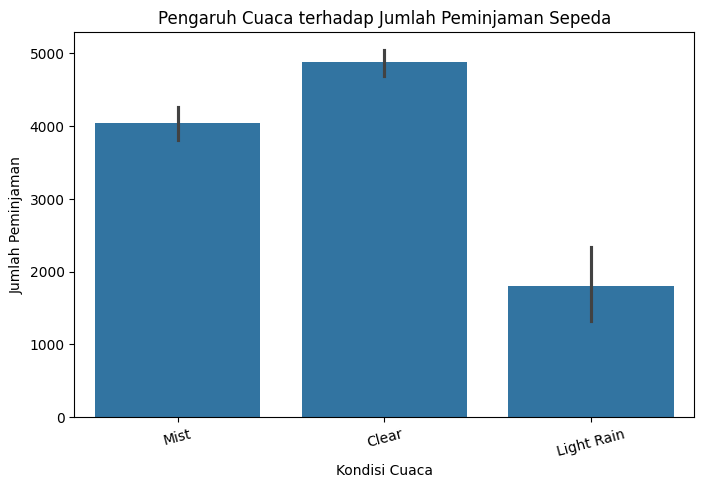

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='weather_name', y='total_rentals', data=df_clean)
plt.title("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=15)
plt.show()

Dari grafik, terlihat bahwa cuaca cerah memiliki jumlah peminjaman tertinggi, yaitu sekitar 4800 peminjaman. Sedangkan cuaca hujan memiliki jumlah peminjaman paling sedikit, yaitu sekitar 1800 peminjaman. Cuaca dengan sedikit hujan berada di tengah-tengah, sekitar 4000 peminjaman. Hal ini menunjukkan bahwa kondisi cuaca sangat berpengaruh terhadap tingkat penggunaan sepeda.

### Pertanyaan 2:

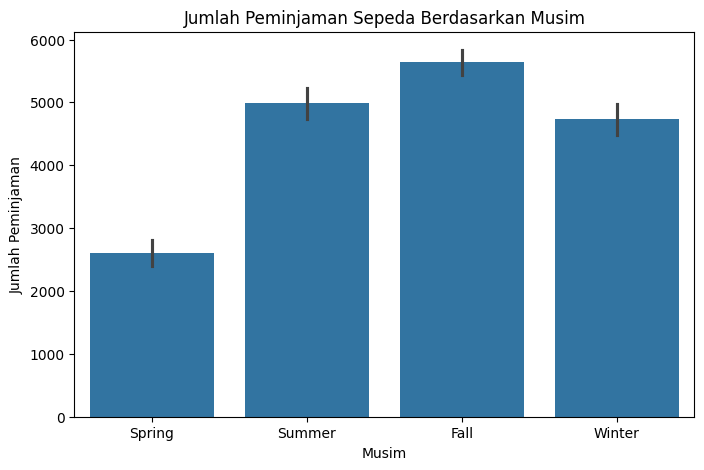

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='season_desc', y='total_rentals', data=df_clean)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()

Musim panas memiliki jumlah peminjaman tertinggi, yaitu sekitar 5700 peminjaman, diikuti musim semi (5000 peminjaman) dan musim gugur (4700 peminjaman). Musim dingin memiliki peminjaman paling rendah, yaitu sekitar 2600 peminjaman. Hal ini menegaskan pola peminjaman yang meningkat saat musim hangat dan menurun di musim dingin.

**Insight:**
- Semakin buruk kondisi cuaca, semakin menurun jumlah peminjaman sepeda.
- Musim gugur memiliki tingkat peminjaman sepeda tertinggi.

## Analisis Lanjutan (Opsional)

In [17]:
df_rfm = df_clean.copy()

In [18]:
# Recency: jarak hari dari tanggal terakhir
max_date = df_rfm['dteday'].max()
df_rfm['Recency'] = (max_date - df_rfm['dteday']).dt.days

# Frequency: bisa dianggap 1 karena tiap baris = 1 hari, atau pakai total_rentals
df_rfm['Frequency'] = df_rfm['total_rentals']

# Monetary: total_rentals
df_rfm['Monetary'] = df_rfm['total_rentals']

# pilih kolom RFM
df_rfm_rfm = df_rfm[['dteday', 'Recency', 'Frequency', 'Monetary']]
df_rfm_rfm.head()


,dteday,Recency,Frequency,Monetary
0,2011-01-01,730,985,985
1,2011-01-02,729,801,801
2,2011-01-03,728,1349,1349
3,2011-01-04,727,1562,1562
4,2011-01-05,726,1600,1600


In [19]:
# Recency: lebih kecil lebih baik → balik urutan
df_rfm_rfm['R_Score'] = pd.qcut(df_rfm_rfm['Recency'], 5, labels=[5,4,3,2,1])

# Frequency & Monetary: lebih besar lebih baik
df_rfm_rfm['F_Score'] = pd.qcut(df_rfm_rfm['Frequency'], 5, labels=[1,2,3,4,5])
df_rfm_rfm['M_Score'] = pd.qcut(df_rfm_rfm['Monetary'], 5, labels=[1,2,3,4,5])

# gabungkan jadi RFM_Score
df_rfm_rfm['RFM_Score'] = df_rfm_rfm['R_Score'].astype(str) + df_rfm_rfm['F_Score'].astype(str) + df_rfm_rfm['M_Score'].astype(str)

df_rfm_rfm.head()


C:\Users\Vanesya\AppData\Local\Temp\ipykernel_38260\1408288566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_rfm['R_Score'] = pd.qcut(df_rfm_rfm['Recency'], 5, labels=[5,4,3,2,1])
C:\Users\Vanesya\AppData\Local\Temp\ipykernel_38260\1408288566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_rfm['F_Score'] = pd.qcut(df_rfm_rfm['Frequency'], 5, labels=[1,2,3,4,5])
C:\Users\Vanesya\AppData\Local\Temp\ipykernel_38260\1408288566.py:6: SettingWithCopyWarning: 
A value is trying to be set on

,dteday,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,2011-01-01,730,985,985,1,1,1,111
1,2011-01-02,729,801,801,1,1,1,111
2,2011-01-03,728,1349,1349,1,1,1,111
3,2011-01-04,727,1562,1562,1,1,1,111
4,2011-01-05,726,1600,1600,1,1,1,111


In [20]:
def rfm_segment(row):
    if row['RFM_Score'] >= '444':
        return 'Top Days'
    elif row['RFM_Score'] >= '333':
        return 'Medium Days'
    else:
        return 'Low Days'

df_rfm_rfm['Segment'] = df_rfm_rfm.apply(rfm_segment, axis=1)
df_rfm_rfm.head()

C:\Users\Vanesya\AppData\Local\Temp\ipykernel_38260\3233433524.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_rfm['Segment'] = df_rfm_rfm.apply(rfm_segment, axis=1)


,dteday,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,2011-01-01,730,985,985,1,1,1,111,Low Days
1,2011-01-02,729,801,801,1,1,1,111,Low Days
2,2011-01-03,728,1349,1349,1,1,1,111,Low Days
3,2011-01-04,727,1562,1562,1,1,1,111,Low Days
4,2011-01-05,726,1600,1600,1,1,1,111,Low Days


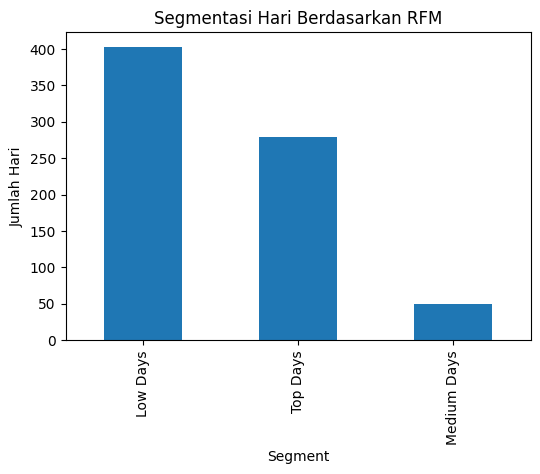

In [23]:
plt.figure(figsize=(6,4))
df_rfm_rfm['Segment'].value_counts().plot(kind='bar')
plt.title('Segmentasi Hari Berdasarkan RFM')
plt.xlabel('Segment')
plt.ylabel('Jumlah Hari')
plt.show()


## Conclusion

- Jumlah peminjaman sepeda paling tinggi terjadi saat cuaca cerah atau mendung ringan, sedangkan cuaca hujan ringan atau ekstrem menurunkan peminjaman secara signifikan.
Sehingga saran yang dapat diberikan fokuskan terhadap ketersediaan sepeda dan promosi pada hari dengan prakiraan cuaca cerah/mendung untuk memaksimalkan peminjaman.
- Peminjaman sepeda cenderung meningkat di musim semi dan musim panas, sementara musim dingin memiliki jumlah peminjaman paling rendah.
Sarannya sesuaikan strategi operasional, seperti jumlah sepeda dan staf, berdasarkan musim untuk memastikan ketersediaan optimal dan pelayanan yang baik.